<a href="https://colab.research.google.com/github/Gokulrajan16/python/blob/main/DL_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets


In [4]:
(X_train,Y_train), (X_test, Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [7]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Training data=60000 Images
Test data=10000 Images

Image dimension-->28 x 28
Grayscale Image-->1 channel

In [8]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


2


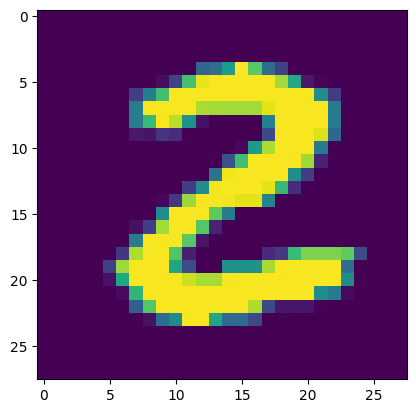

In [12]:
#displaying the Image
plt.imshow(X_train[25])
plt.show

#print the corresponding label
print(Y_train[25])

In [14]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one Hot encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [15]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [17]:
#print the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [20]:
#setting up the layers of the Neural Network
model=keras.Sequential([
                keras.layers.Flatten(input_shape=(28,28)),
                keras.layers.Dense(50,activation='relu'),
                keras.layers.Dense(50,activation='relu'),
                keras.layers.Dense(10,activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.3055 - accuracy: 0.9116
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1405 - accuracy: 0.9570
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1039 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0608 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0480 - accuracy: 0.9846
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

Accuracy on test data=98.8%

In [24]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0968 - accuracy: 0.9743


Test Data accuracy=97.4%

In [25]:
print(X_test.shape)

(10000, 28, 28)


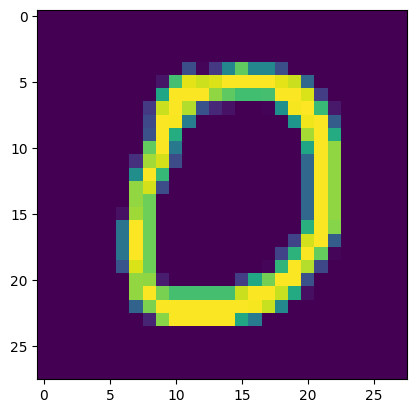

In [27]:
#first data point in X_test
plt.imshow(X_test[10])
plt.show()

In [29]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
print(Y_pred.shape)

(10000, 10)


In [31]:
print(Y_pred[10])

[9.99999285e-01 6.83619510e-05 7.92536557e-01 1.00652705e-05
 1.49561796e-09 1.00817919e-01 5.88468909e-01 2.33604029e-01
 1.27774896e-02 1.54456531e-03]


model.predict() gives the probablity of each class for that data point


In [32]:
#converting the prediction probablities to class label
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [35]:
#converting the prediction probablities to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

confusion matrix

In [37]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)


In [38]:
print(conf_mat)

tf.Tensor(
[[ 967    0    0    3    0    4    4    1    1    0]
 [   0 1122    2    2    0    1    2    0    6    0]
 [   2    1 1002    4    5    0    2   10    6    0]
 [   0    0    2  986    0   13    1    6    0    2]
 [   2    1    2    1  949    2    6    3    1   15]
 [   1    0    0    3    2  880    3    0    2    1]
 [   5    3    1    1    5   10  933    0    0    0]
 [   0    7   10    4    0    1    0  998    2    6]
 [   4    0    3    8    6    9    2    3  935    4]
 [   3    4    0    5   11    6    0    6    2  972]], shape=(10, 10), dtype=int32)
